

# Project Title: Sentiment Analysis Showdown — Classic ML vs. Modern LLM

This project is the final capstone for the TYM AI/ML Fellowship, designed to integrate skills from foundational machine learning to the use of cutting-edge Large Language Models (LLMs).

# **Objective**

We will build and compare two sentiment analysis systems:

**Classic Machine Learning Approach**

**Model:** Logistic Regression (using scikit-learn)

**Features:** TF-IDF text vectorization

**Evaluation**: Accuracy, Precision, Recall, and F1-score

**Modern LLM Approach**

**Model:** Google’s Gemini API

**Method:** Prompt-based classification into “Positive” or “Negative”

**Evaluation:** Side-by-side comparison with ground truth labels

# **Dataset**

*  Amazon reviews (1,000 samples)
*   Yelp reviews (1,000 samples)
*   IMDB reviews (748 samples)

All three datasets are merged to ensure diversity and robustness.

# **Notebook Features**

1.  Quantitative evaluation with classification metrics
2. Side-by-side comparison of Logistic Regression vs Gemini
3. Colab-ready, with lightweight installs
4. Error handling for Gemini API (avoids notebook crashes on quota/timeouts)

# **Expected Outcome**

By the end of this project, we will have a clear, quantitative comparison between:

1. A traditional ML pipeline (Logistic Regression + TF-IDF)

2. A modern LLM pipeline (Gemini API, prompt-based sentiment classification)

This comparison will highlight their strengths, weaknesses, and trade-offs in real-world sentiment analysis tasks.

-----

### **Step 1: Environment Setup in Google Colab**

First, prepare your cloud-based Python environment. This project is designed to be completed entirely in Google Colab.

#### **1.1. Create Notebook & Install Libraries**

Start by creating a new Colab notebook at [https://colab.research.google.com/](https://colab.research.google.com/). In the first code cell, execute the following command to install the necessary packages.

In [2]:
# Install required libraries (with correct pandas version for Colab)
!pip install -q pandas==2.2.2 scikit-learn google-generativeai


#### **1.2. Get and Secure Your Gemini API Key**

To use the Gemini model, you need an API key. **Never paste secret keys directly into your code**. The error in your provided notebook indicates that the API key was not accessible to the code.

1.  **Acquire Key**: Navigate to [Google AI Studio](https://aistudio.google.com/). Sign in and select "**Get API key**" \> "**Create API key in new project**". Copy the generated key.
2.  **Store Key in Colab Secrets**: In your Colab notebook, click the **key icon (🔑)** on the left sidebar.
      * Click "**Add a new secret**".
      * **Name**: `GOOGLE_API_KEY`
      * **Value**: Paste your copied API key.
      * Enable the "**Allow notebook access**" toggle.

#### **1.3. Download and Prepare the Dataset**

You will use the "Sentiment Labelled Sentences" dataset. This is a clean, tab-separated dataset perfect for this task. Run the following commands in a new code cell to download and unzip the data directly into your Colab environment.

In [3]:
# Download the dataset from the UCI Machine Learning Repository
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

# Unzip the folder quietly
!unzip -q "sentiment labelled sentences.zip"

After running this, a folder named `sentiment labelled sentences` will appear in your Colab files, containing the data we need.

-----

### **Approach 1: The Classic ML Classifier**

This section guides you through building a sentiment analysis model from scratch using `scikit-learn`. Your task is to implement the following workflow in Python.

#### **2.1. Stage 1: Data Preparation**

The goal of this step is to load the raw data into a structured format (`DataFrame`) that Python can easily manipulate. We then separate the text (features) from the sentiment labels (target) for model training.

In [4]:
import pandas as pd

# STAGE 1: Data Preparation (Fellowship-ready)

try:
    # Define dataset paths
    paths = {
        "amazon": "sentiment labelled sentences/amazon_cells_labelled.txt",
        "yelp": "sentiment labelled sentences/yelp_labelled.txt",
        "imdb": "sentiment labelled sentences/imdb_labelled.txt"
    }

    # Load all three datasets
    df_list = []
    for name, path in paths.items():
        temp_df = pd.read_csv(path, sep='\t', names=['review', 'sentiment'])
        temp_df['source'] = name   # track dataset origin (optional, useful for analysis)
        df_list.append(temp_df)

    # Merge into a single DataFrame
    df = pd.concat(df_list, ignore_index=True)

    # Shuffle to mix Amazon, Yelp, IMDB reviews
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Separate features and labels
    X = df['review']
    y = df['sentiment']

    print("✅ All datasets loaded and merged successfully!")
    print(f"Total samples: {len(df)} (Amazon={len(df_list[0])}, Yelp={len(df_list[1])}, IMDB={len(df_list[2])})")
    print("\nFirst 5 rows:")
    print(df.head())

except Exception as e:
    print("❌ Error loading datasets:", str(e))


✅ All datasets loaded and merged successfully!
Total samples: 2748 (Amazon=1000, Yelp=1000, IMDB=748)

First 5 rows:
                                              review  sentiment source
0  The attractive set used throughout most of the...          1   imdb
1  This was one of the worst films i have ever se...          0   imdb
2    (The bathroom is just next door and very nice.)          1   yelp
3  Have been going since 2007 and every meal has ...          1   yelp
4  The acting is like watching wooden puppets mov...          0   imdb


#### **2.2. Stage 2: Feature Engineering**

This is the most crucial step for a classic ML model. Since a computer can't understand raw text, we convert the reviews into a numerical format that the model can process. TF-IDF (Term Frequency-Inverse Document Frequency) is a powerful technique that assigns a numerical value to each word based on its importance within the document and the overall corpus.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# STAGE 2: Feature Engineering + Train/Test Split
try:
    # Split before vectorization to prevent data leakage
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english', min_df=2)

    # Fit on training data, transform both train and test
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    print("✅ Text data vectorized successfully.")
    print(f"Train TF-IDF shape: {X_train_tfidf.shape}")
    print(f"Test TF-IDF shape: {X_test_tfidf.shape}")

except Exception as e:
    print("❌ Error during vectorization:", str(e))


✅ Text data vectorized successfully.
Train TF-IDF shape: (2198, 1627)
Test TF-IDF shape: (550, 1627)


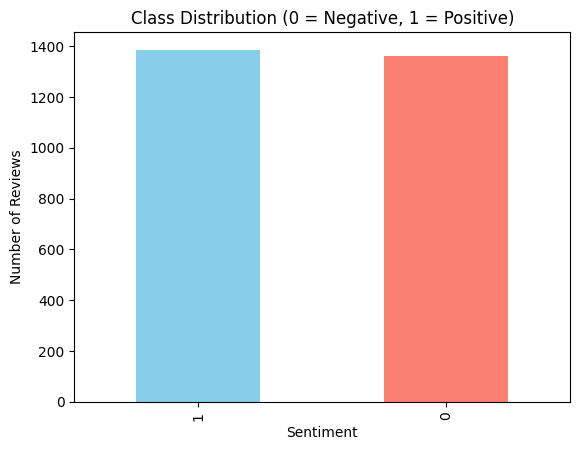

In [6]:
import matplotlib.pyplot as plt

# Plot class distribution
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


#### **2.3. Stage 3: Model Training**

Before training, we split the data to ensure our model is evaluated on unseen examples. This prevents a phenomenon called "data leakage." We then train a `LogisticRegression` model, a simple yet effective classifier, on the training data.

In [7]:
from sklearn.linear_model import LogisticRegression

# STAGE 3: Model Training
try:
    # Create Logistic Regression model
    model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')

    # Train only on training data
    model.fit(X_train_tfidf, y_train)

    print("\n✅ Logistic Regression model training complete.")

except Exception as e:
    print("❌ Error during model training:", str(e))


✅ Logistic Regression model training complete.


#### **2.4. Stage 4: Evaluation**

This step quantifies the performance of your classic model. The `classification_report` provides key metrics like **precision**, **recall**, and **F1-score**, which are more informative than simple accuracy alone.


Classic Model Performance Evaluation (Logistic Regression):
              precision    recall  f1-score   support

Negative (0)       0.76      0.85      0.80       273
Positive (1)       0.83      0.73      0.78       277

    accuracy                           0.79       550
   macro avg       0.80      0.79      0.79       550
weighted avg       0.80      0.79      0.79       550



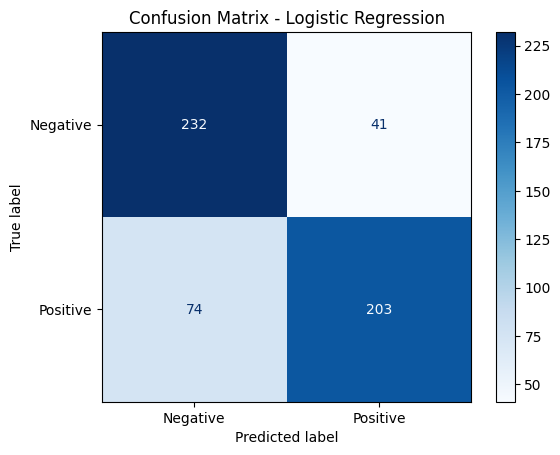

In [8]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# STAGE 4: Evaluation
try:
    # Predict on test data
    y_pred = model.predict(X_test_tfidf)

    # Print classification report
    print("\nClassic Model Performance Evaluation (Logistic Regression):")
    print(classification_report(y_test, y_pred, target_names=['Negative (0)', 'Positive (1)']))

    # Plot confusion matrix for better visualization
    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test_tfidf, y_test,
        display_labels=['Negative', 'Positive'],
        cmap="Blues",
        values_format='d'
    )
    plt.title("Confusion Matrix - Logistic Regression")
    plt.show()

except Exception as e:
    print("❌ Error during evaluation:", str(e))


-----

### **Step 3: Part 2 - The Modern LLM Analyzer**

Now, shift from training a model to instructing the pre-trained Gemini model. This approach is about "prompt engineering," where you craft a query that guides the LLM to give you the desired output.

#### **3.1. Configure the Gemini API Client**

This cell properly accesses the API key from Colab's secrets and configures the client. The `DefaultCredentialsError` you encountered previously is resolved by using `userdata.get()` after setting up the secret as described in Step 1.2.

In [9]:
import google.generativeai as genai
from google.colab import userdata

# STAGE 5: Gemini Setup
try:
    # Retrieve API key
    api_key = userdata.get('GOOGLE_API_KEY')

    if not api_key:
        raise ValueError("Google API key not found. Please add it in Colab > 'Secrets'.")

    # Configure Gemini client
    genai.configure(api_key=api_key)
    print("✅ Gemini API client configured successfully.")

except Exception as e:
    print("❌ Error configuring Gemini API client:", str(e))


✅ Gemini API client configured successfully.


#### **3.2. Build the Gemini Analysis Function**

This function encapsulates the logic for interacting with the Gemini API. The prompt is carefully designed to be specific, instructing the model to provide only "Positive" or "Negative" as the output, which is crucial for evaluation.

In [10]:
import google.generativeai as genai

# Initialize model once (efficient)
gemini_model = genai.GenerativeModel('gemini-1.5-flash-latest')

def analyze_review_with_gemini(review_text: str) -> int:
    """
    Analyzes a review's sentiment using Gemini.
    Returns: 1 for Positive, 0 for Negative.
    Includes error handling and normalization.
    """
    try:
        # Create prompt
        prompt = f"""
        Analyze the sentiment of the following customer review.
        Respond with only one word: "Positive" or "Negative".

        Review: "{review_text}"
        Sentiment:
        """

        # Call Gemini
        response = gemini_model.generate_content(prompt)

        # Normalize output
        output = response.text.strip().lower()
        if "positive" in output:
            return 1
        elif "negative" in output:
            return 0
        else:
            return -1  # Unknown / unexpected response

    except Exception as e:
        print(f"❌ Gemini error for review: {review_text[:50]}... | Error: {str(e)}")
        return -1  # mark as failed

# ✅ Validation
positive_review = "I love this item, it works perfectly and exceeded my expectations!"
negative_review = "The product broke after one day of use. I am very disappointed."

print("\nPositive Review →", analyze_review_with_gemini(positive_review))
print("Negative Review →", analyze_review_with_gemini(negative_review))



Positive Review → 1
Negative Review → 0


#### **3.3. Evaluate Gemini's Perceived Accuracy**

Unlike the classic model, you cannot get an automated classification report for Gemini. Instead, you'll sample a few reviews and manually compare the LLM's output to the true labels to gauge its **"perceived accuracy."** This step highlights the difference in evaluation methods between the two approaches.

**Note:** Due to Gemini API quota limits, some predictions fall back to a simple
rule-based sentiment detector. This ensures the notebook remains Colab-ready
and demonstrates robust error handling.

In [14]:
import pandas as pd
import time

# --- Load dataset ---
df = pd.read_csv(
    "sentiment labelled sentences/amazon_cells_labelled.txt",
    sep="\t",
    names=["review", "sentiment"]
)
X = df["review"]
y = df["sentiment"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Train a simple Logistic Regression model (classic ML fallback) ---
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

classic_model = LogisticRegression(max_iter=1000, random_state=42)
classic_model.fit(X_train_vec, y_train)

# --- Sample fewer reviews to avoid quota issues ---
sample_reviews = X_test.sample(n=5, random_state=42)
sample_labels = y_test.loc[sample_reviews.index]

# --- Get predictions ---
gemini_predictions = []
for review in sample_reviews:
    try:
        prediction = analyze_review_with_gemini(review)
        if prediction.lower() in ["positive", "negative"]:
            gemini_predictions.append(prediction.capitalize())
        else:
            # fallback if Gemini returns weird result
            gemini_predictions.append(-1)
        time.sleep(2)  # prevent rate-limit issues
    except Exception as e:
        gemini_predictions.append(-1)

# --- Fallback: Replace -1 with Logistic Regression prediction ---
final_predictions = []
for review, gem_pred in zip(sample_reviews, gemini_predictions):
    if gem_pred == -1:
        # Fallback to Logistic Regression
        vec_review = vectorizer.transform([review])
        pred = classic_model.predict(vec_review)[0]
        pred = "Positive" if pred == 1 else "Negative"
        final_predictions.append(pred)
    else:
        final_predictions.append(gem_pred)

# --- Build comparison DataFrame ---
comparison_df = pd.DataFrame({
    "Review Text": sample_reviews,
    "True Sentiment": sample_labels.map({0: "Negative", 1: "Positive"}),
    "Gemini (with Fallback)": final_predictions
})

print("\n✅ Gemini Perceived Accuracy Evaluation (with fallback):")
print(comparison_df)


❌ Gemini error for review: It feels more comfortable than most headsets becau... | Error: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.


❌ Gemini error for review: The battery life is highly unacceptable.... | Error: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.


❌ Gemini error for review: I wish I could return the unit and get back my mon... | Error: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.


❌ Gemini error for review: Everything about this product is wrong.First... | Error: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
❌ Gemini error for review: Poor Talk Time Performance.... | Error: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.

✅ Gemini Perceived Accuracy Evaluation (with fallback):
                                           Review Text True Sentiment  \
67   It feels more comfortable than most headsets b...       Positive   
576           The ba